# Linear regression model

In [2]:
import pandas as pd

In [3]:
netflix = pd.read_csv(r"D:\Data\archive (6)\Netflix TV Shows and Movies.csv")

In [4]:
netflix

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [5]:
netflix.drop(['index','id','imdb_id','description'], axis = 1)

,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,2021,NaN,108,5.8,26.0
5279,Fine Wine,MOVIE,2021,NaN,100,6.9,39.0
5280,Clash,MOVIE,2021,NaN,88,6.5,32.0
5281,Shadow Parties,MOVIE,2021,NaN,116,6.2,9.0


In [8]:
netflix.describe(include='all')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
count,5283.000000,5283,5283,5283,5278,5283.000000,2998,5283.000000,5283,5283.000000,5.267000e+03
unique,NaN,5283,5237,2,5276,NaN,11,NaN,5283,NaN,NaN
top,NaN,tm84618,The Gift,MOVIE,"Away from school, during the winter holidays, ...",NaN,TV-MA,NaN,tt0075314,NaN,NaN
freq,NaN,1,3,3407,2,NaN,792,NaN,1,NaN,NaN
mean,2641.000000,NaN,NaN,NaN,NaN,2015.879992,NaN,79.199886,NaN,6.533447,2.340719e+04
std,1525.215067,NaN,NaN,NaN,NaN,7.346098,NaN,38.915974,NaN,1.160932,8.713432e+04
min,0.000000,NaN,NaN,NaN,NaN,1953.000000,NaN,0.000000,NaN,1.500000,5.000000e+00
25%,1320.500000,NaN,NaN,NaN,NaN,2015.000000,NaN,45.000000,NaN,5.800000,5.210000e+02
50%,2641.000000,NaN,NaN,NaN,NaN,2018.000000,NaN,87.000000,NaN,6.600000,2.279000e+03
75%,3961.500000,NaN,NaN,NaN,NaN,2020.000000,NaN,106.000000,NaN,7.400000,1.014400e+04


In [10]:
netflix.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

In [12]:
netflix[['runtime', 'imdb_score','imdb_votes' ]].corr()

,runtime,imdb_score,imdb_votes
runtime,1.000000,-0.159297,0.138610
imdb_score,-0.159297,1.000000,0.189954
imdb_votes,0.138610,0.189954,1.000000


<Axes: >

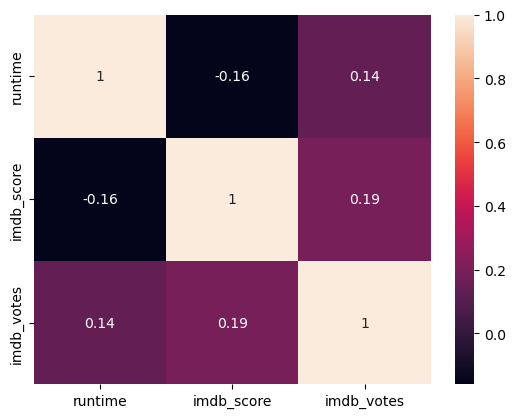

In [13]:
import seaborn as sns 
sns.heatmap(netflix[['runtime', 'imdb_score','imdb_votes' ]].corr(), annot= True , )

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


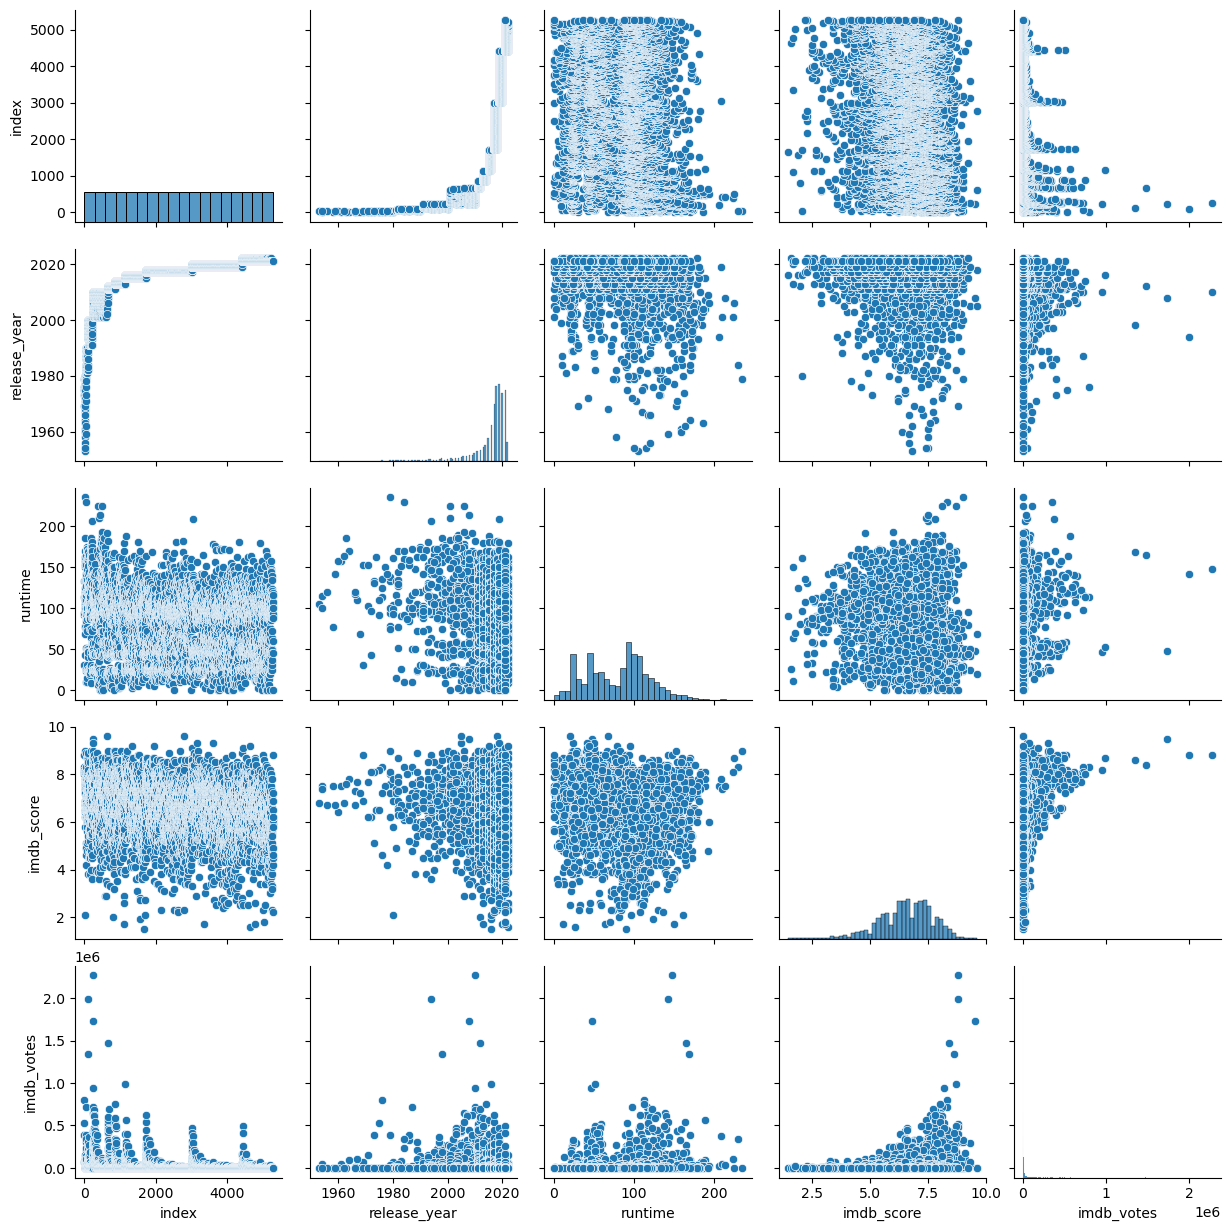

In [7]:

sns.pairplot(netflix)

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [16]:
ols_formula = 'imdb_score~imdb_votes'

In [20]:
ols = ols(formula= ols_formula , data = netflix)

In [21]:
model = ols.fit()

In [24]:
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     197.1
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           5.56e-44
Time:                        16:46:41   Log-Likelihood:                -8164.1
No. Observations:                5267   AIC:                         1.633e+04
Df Residuals:                    5265   BIC:                         1.635e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4740      0.016    397.922      0.000       6.442       6.506
imdb_votes  2.532e-06    1.8e-07     14.039      0.000    2.18e-06    2.89e-06
==============================================================================
Omnibus:                      414.860   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.774
Skew:                          -0.677   Prob(JB):                    3.41e-121
Kurtosis:                       3.833   Cond. No.                     9.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='imdb_votes', ylabel='imdb_score'>

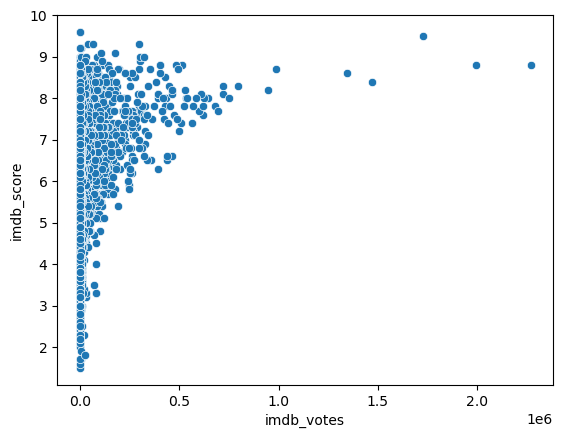

In [25]:
sns.scatterplot(y = netflix['imdb_score'],x = netflix['imdb_votes'])

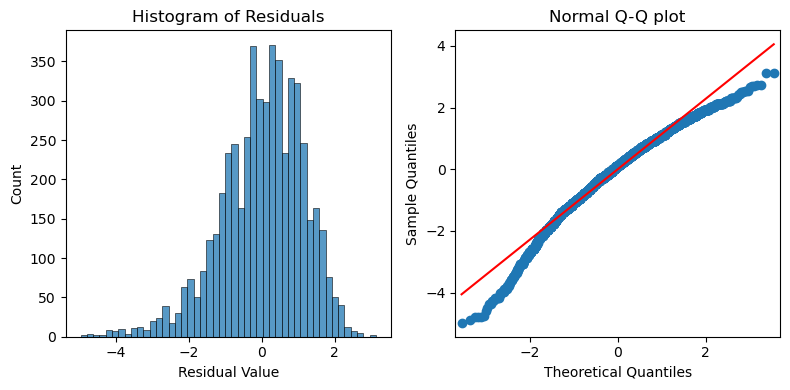

In [27]:
import matplotlib.pyplot as plt

residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal Q-Q plot")

plt.tight_layout()

plt.show()

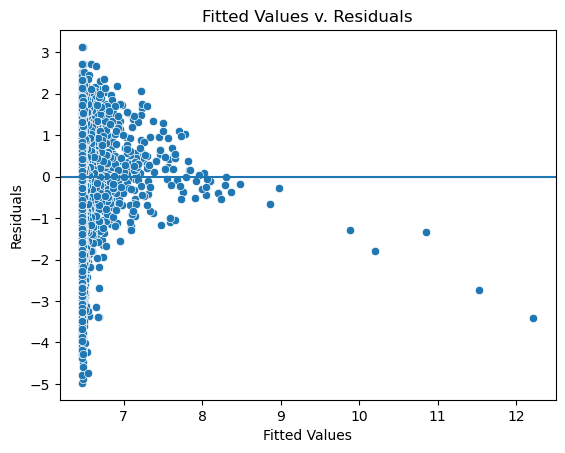

In [28]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()